<a href="https://colab.research.google.com/github/Kaivan-Khazeni/WaterQualityPrediction/blob/main/WaterQualityPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
import requests  # Import the requests library
import opendatasets as od
from google.colab import drive

drive.mount("/content/drive")


Mounted at /content/drive


# Water Quality Prediction:

Will use a ML model to predict if a water is drinkable

Date : April 10th, 2022

Kaivan Khazeni

# 1. Data Cleaning / Preprocessing
*italicized text*

In [40]:
water_df = pd.read_csv("water_potability.csv")

In [41]:
print("shape of dataframe")
water_df.shape

shape of dataframe


(3276, 10)

In [42]:
print("Name of Variables")
print(water_df.columns)

Name of Variables
Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')


In [43]:
print("Null value count for each column in the dataframe")
print(water_df.isna().sum())

Null value count for each column in the dataframe
ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


Since there are a good amount of column values with NULL or missing values, there are two approaches:


1.   Remove rows with missing data
2.   Fill missing data with average, median, mode

To decide this, I will plot the columns via density plot and observe for symmetric or skewed data.



I will do this for PH, Sulfate, and Trihalomethanes 


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


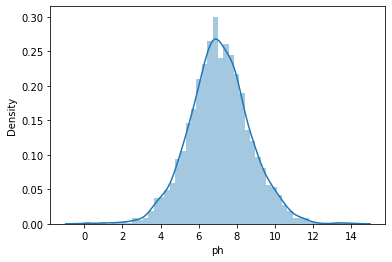

In [44]:
import seaborn as sns
# Distribution plot
sns.distplot(water_df['ph'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


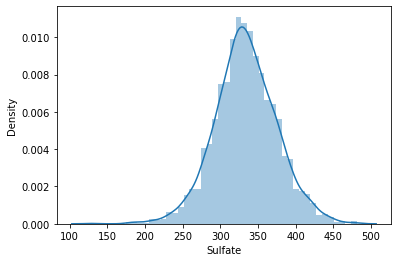

In [45]:
sns.distplot(water_df['Sulfate'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


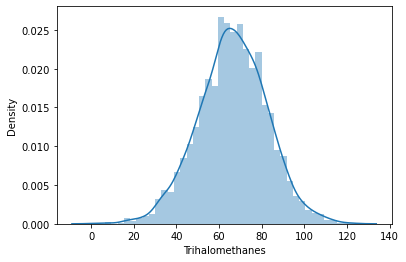

In [46]:
sns.distplot(water_df['Trihalomethanes'])

Since all three variables showed symmetric density plot, I will fill the na columns with average of the column type in order to fill any NA/NULL rows.

In [52]:
water_df = water_df.fillna(water_df.mean())


In [53]:
print("Checking for null values again, results below")
print(water_df.isna().sum())

Checking for null values again, results below
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


In [61]:
water_df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.469956,32.879761,8768.570828,1.583085,36.142612,80.824064,3.308162,15.769881,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.080795,196.967627,20927.833607,7.130299,333.775777,421.884968,14.218338,66.396293,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [62]:
water_df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


In [63]:
print("Distrbution of potable water versus non potable water")
print(len(water_df[water_df['Potability']==0]))
print(len(water_df[water_df['Potability']==1]))

Distrbution of potable water versus non potable water
1998
1278


Data appears to be evenly distributed. No need for any oversampling techniques such as SMOTE

# Splitting Data + Logistic Regression Model Fitting

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

Will split the data via a train_test_split import via sklearn. Then will fit the Logistic Regression Model on the feature set.

This may not be successful, since the values of the features are vastly different. The route to take if this fails is a TensorFlow neural network. 

Other ML Models such as random forests and decision tree classifers will also be difficult due to the non binary data at hand. NN will allow the feature set to be learned.

In [85]:
y = water_df['Potability']
X = water_df.drop(['Potability'],axis=1)

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, stratify=y)

In [87]:
Log_Reg = LogisticRegression(random_state=5,multi_class='multinomial',solver='lbfgs')


In [90]:
Log_Reg.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial', random_state=5)

In [91]:
def cross_validate(model, X, y, metric):
  skf = StratifiedKFold(n_splits=5, shuffle= True, random_state=42)
  splits = skf.get_n_splits(X, y)
  eval_model = cross_val_score(model, X,y,scoring=metric, cv=splits)
  print("Avg f1 score: ", eval_model.mean())
  print("\n STD of f1 score: ", eval_model.std())
  return eval_model

In [ ]:
cross_validate(Log_Reg,X,y,'f1_weighted')